In [360]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,log_loss,roc_auc_score,f1_score
%matplotlib notebook
%matplotlib inline

In [361]:


# Load the Excel file
data = pd.read_csv("C:/Users/HP PROBOOK/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display the first 6 rows
data.iloc[:6]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [362]:
data['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [363]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [364]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [365]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [366]:
#data cleaning 
data.drop('customerID',axis=1,inplace=True)

In [68]:
data.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [69]:
#total charges
data.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [367]:
data[data['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [368]:
#missing values:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [372]:
def fix_total_charges(row):
    if row['totalcharges'] == ' ':
        return row['monthlycharges']
    else:
        return row['totalcharges']
    
data['totalcharges'] = data.apply(fix_total_charges, axis=1)

In [371]:
data[data['totalcharges']==' ']

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [370]:
#
data.columns=data.columns.str.lower().str.replace(' ','-')

In [151]:
data['totalcharges'].fillna(data['monthlycharges'], inplace=True)

In [112]:
data.Churn =(data.Churn=='yes' ).astype(int)

In [105]:
data.churn

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: churn, Length: 7043, dtype: int32

In [114]:
data.Churn.value_counts()

Churn
0    7043
Name: count, dtype: int64

In [82]:
data[data['totalcharges']==' ']

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [296]:
len(data[data['totalcharges']==' '])

0

In [373]:
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors='coerce')

In [374]:
len(data[data['totalcharges']==' '])

0

In [123]:
# Just Confirm
data.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754],:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [141]:
data.Churn=(data.Churn == 'Yes').astype(int)

In [142]:
data.Churn.value_counts()  #imbalance

Churn
0    5174
1    1869
Name: count, dtype: int64

In [143]:
data.Churn.value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [144]:
data.Churn.mean()

0.2653698707936959

In [380]:
#EDA 
data['seniorcitizen']=data['seniorcitizen'].astype('object')

In [381]:
categorical=list(data.select_dtypes(include=['object']).columns)

In [382]:
numerical=list(data.select_dtypes(include=['number']).columns)
numerical,categorical

(['tenure', 'monthlycharges', 'totalcharges'],
 ['gender',
  'seniorcitizen',
  'partner',
  'dependents',
  'phoneservice',
  'multiplelines',
  'internetservice',
  'onlinesecurity',
  'onlinebackup',
  'deviceprotection',
  'techsupport',
  'streamingtv',
  'streamingmovies',
  'contract',
  'paperlessbilling',
  'paymentmethod',
  'churn'])

In [383]:
numerical.remove('churn')

ValueError: list.remove(x): x not in list

In [384]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [385]:
data[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
churn               2
dtype: int64

In [207]:
#risk ratio:
global_mean=data.churn.mean()

In [168]:
round(global_mean,2)

0.27

In [208]:
churn_gender=data.groupby('gender').churn.mean()

In [209]:
churn_gender

gender
Female    0.269209
Male      0.261603
Name: churn, dtype: float64

In [210]:
churn_partener=data.groupby('partner').churn.mean()

In [211]:
churn_partener

partner
No     0.329580
Yes    0.196649
Name: churn, dtype: float64

In [212]:
partener_risk=churn_partener/global_mean

In [213]:
partener_risk

partner
No     1.241964
Yes    0.741038
Name: churn, dtype: float64

In [214]:
from IPython.display import display
for feature in categorical:
    df_group=data.groupby(by=feature).churn.agg(['mean'])
    df_group['diff']=df_group['mean']-global_mean
    df_group['risk']=df_group['mean']/global_mean
    display(df_group)

,mean,diff,risk
customerid,,,
0002-ORFBO,0.0,-0.26537,0.000000
0003-MKNFE,0.0,-0.26537,0.000000
0004-TLHLJ,1.0,0.73463,3.768325
0011-IGKFF,1.0,0.73463,3.768325
0013-EXCHZ,1.0,0.73463,3.768325
...,...,...,...
9987-LUTYD,0.0,-0.26537,0.000000
9992-RRAMN,1.0,0.73463,3.768325
9992-UJOEL,0.0,-0.26537,0.000000


,mean,diff,risk
gender,,,
Female,0.269209,0.003839,1.014466
Male,0.261603,-0.003766,0.985807


,mean,diff,risk
seniorcitizen,,,
0,0.236062,-0.029308,0.889557
1,0.416813,0.151443,1.570686


,mean,diff,risk
partner,,,
No,0.329580,0.064210,1.241964
Yes,0.196649,-0.068721,0.741038


,mean,diff,risk
dependents,,,
No,0.312791,0.047422,1.178700
Yes,0.154502,-0.110868,0.582215


,mean,diff,risk
phoneservice,,,
No,0.249267,-0.016103,0.939319
Yes,0.267096,0.001726,1.006506


,mean,diff,risk
multiplelines,,,
No,0.250442,-0.014927,0.943749
No phone service,0.249267,-0.016103,0.939319
Yes,0.286099,0.020729,1.078114


,mean,diff,risk
internetservice,,,
DSL,0.189591,-0.075779,0.714441
Fiber optic,0.418928,0.153558,1.578656
No,0.074050,-0.191320,0.279044


,mean,diff,risk
onlinesecurity,,,
No,0.417667,0.152297,1.573906
No internet service,0.074050,-0.191320,0.279044
Yes,0.146112,-0.119258,0.550597


,mean,diff,risk
onlinebackup,,,
No,0.399288,0.133918,1.504645
No internet service,0.074050,-0.191320,0.279044
Yes,0.215315,-0.050055,0.811377


,mean,diff,risk
deviceprotection,,,
No,0.391276,0.125906,1.474456
No internet service,0.074050,-0.191320,0.279044
Yes,0.225021,-0.040349,0.847951


,mean,diff,risk
techsupport,,,
No,0.416355,0.150985,1.568960
No internet service,0.074050,-0.191320,0.279044
Yes,0.151663,-0.113706,0.571517


,mean,diff,risk
streamingtv,,,
No,0.335231,0.069861,1.263261
No internet service,0.074050,-0.191320,0.279044
Yes,0.300702,0.035332,1.133143


,mean,diff,risk
streamingmovies,,,
No,0.336804,0.071434,1.269188
No internet service,0.074050,-0.191320,0.279044
Yes,0.299414,0.034044,1.128291


,mean,diff,risk
contract,,,
Month-to-month,0.427097,0.161727,1.609440
One year,0.112695,-0.152675,0.424672
Two year,0.028319,-0.237051,0.106714


,mean,diff,risk
paperlessbilling,,,
No,0.163301,-0.102069,0.615371
Yes,0.335651,0.070281,1.264842


,mean,diff,risk
paymentmethod,,,
Bank transfer (automatic),0.167098,-0.098271,0.629681
Credit card (automatic),0.152431,-0.112939,0.574410
Electronic check,0.452854,0.187484,1.706502
Mailed check,0.191067,-0.074303,0.720003


,mean,diff,risk
totalcharges,,,
19.7,0.0,-0.26537,0.000000
19.85,0.0,-0.26537,0.000000
20.0,0.0,-0.26537,0.000000
20.25,0.0,-0.26537,0.000000
25.35,0.0,-0.26537,0.000000
...,...,...,...
997.75,0.0,-0.26537,0.000000
998.1,0.0,-0.26537,0.000000
999.45,1.0,0.73463,3.768325


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

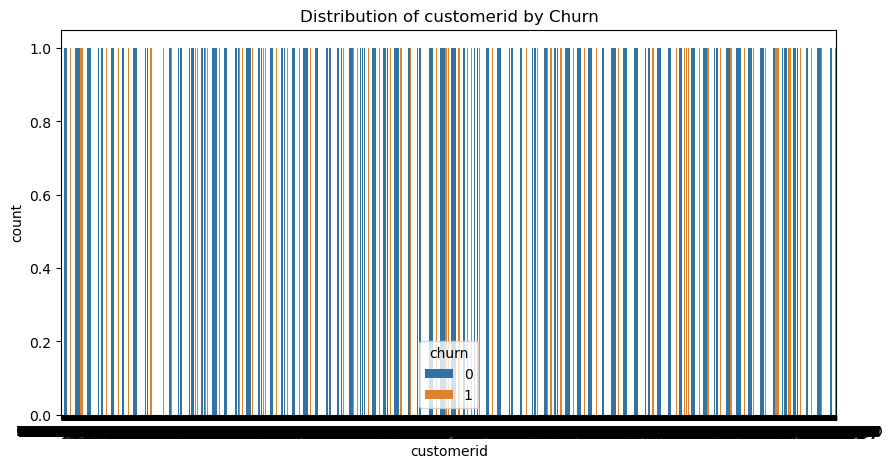

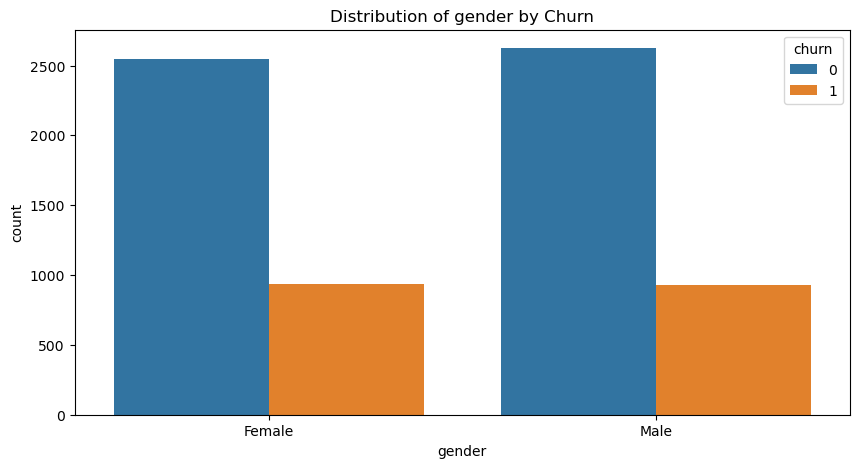

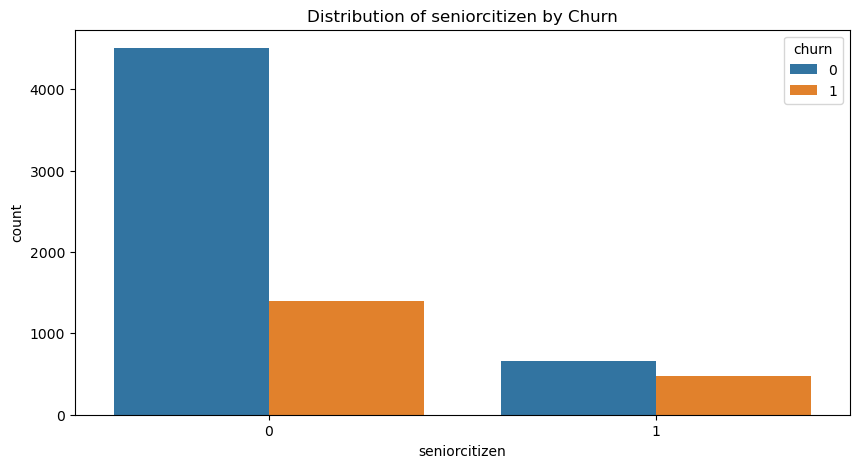

In [215]:


# Plot count plots for the first three categorical features with respect to churn
for feature in categorical[:3]:
    plt.figure(figsize=(10, 5))
    _ = sns.countplot(x=feature, hue='churn', data=data)
    plt.title(f'Distribution of {feature} by Churn')
    plt.show()


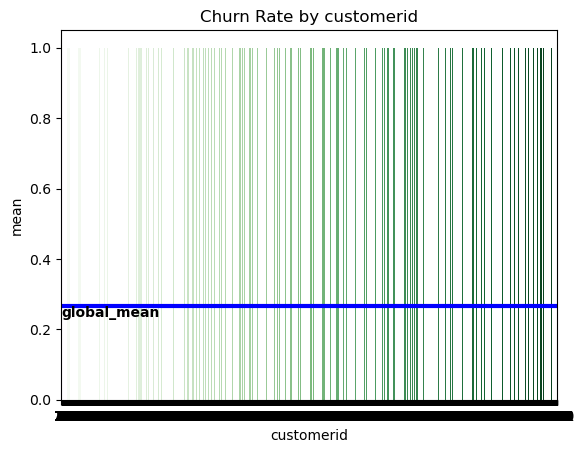

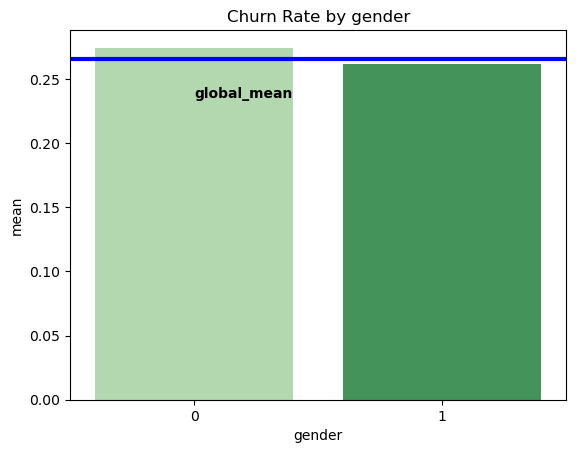

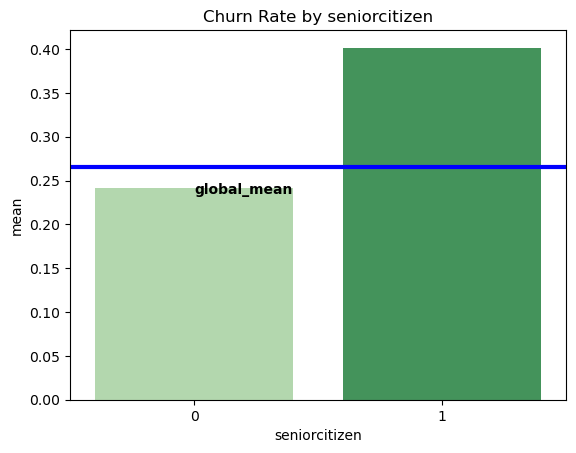

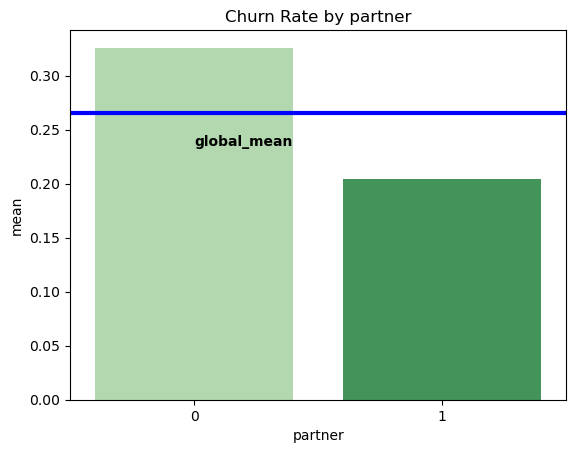

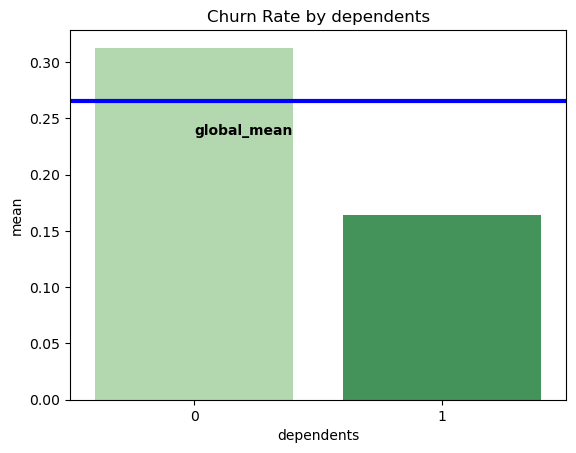

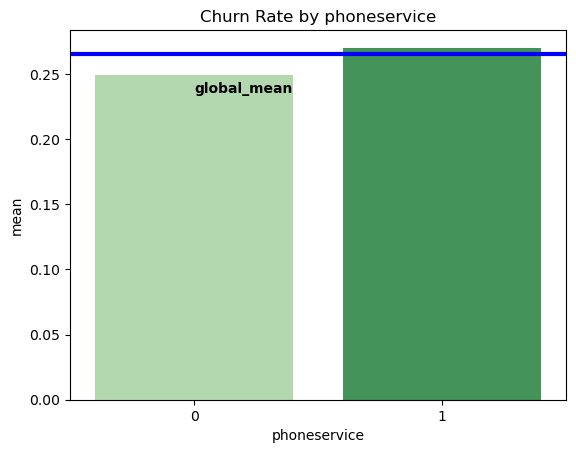

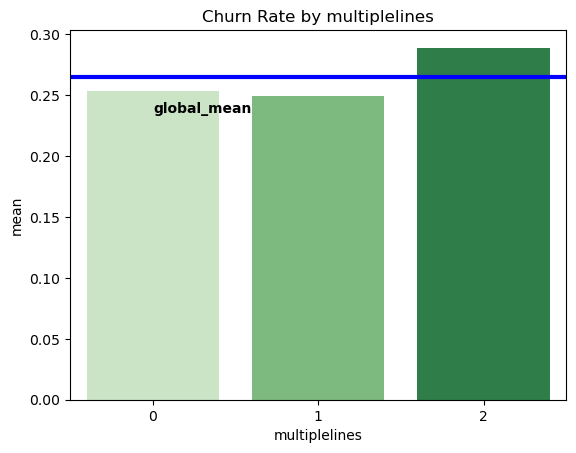

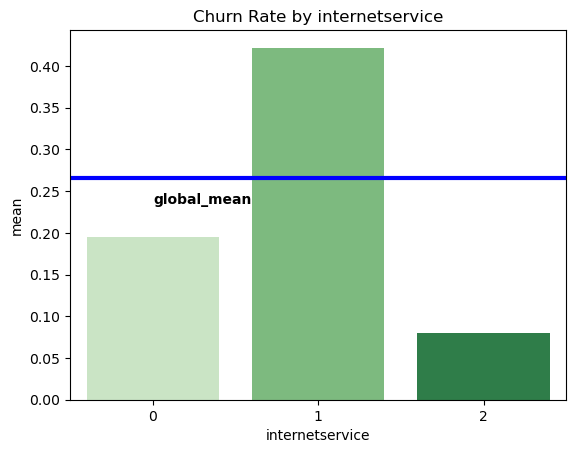

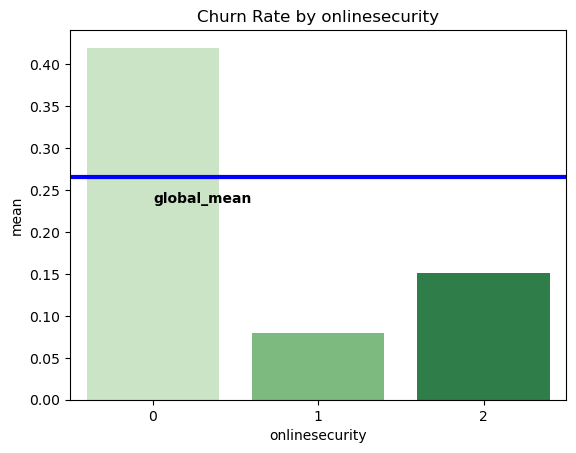

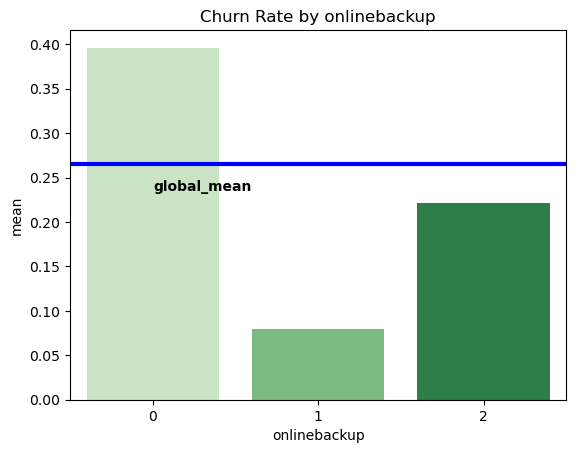

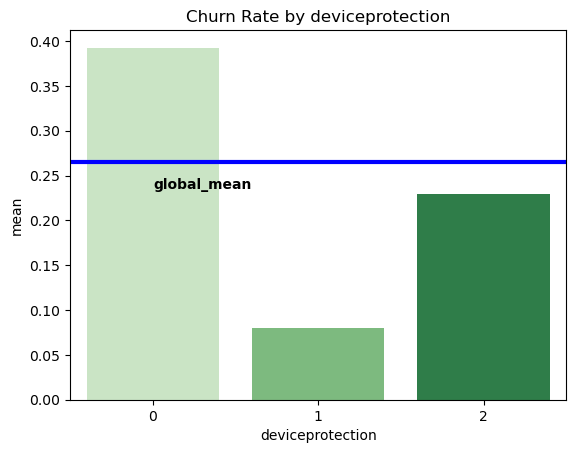

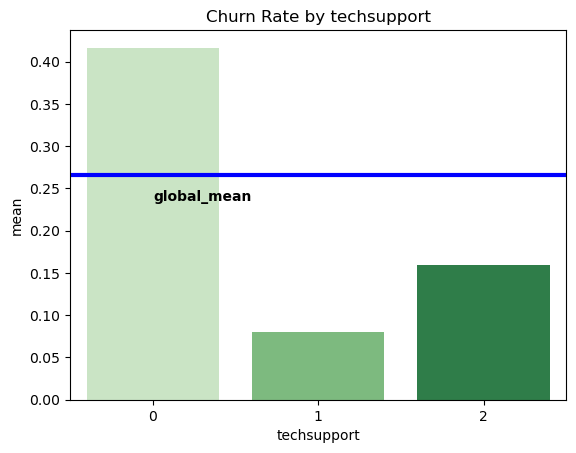

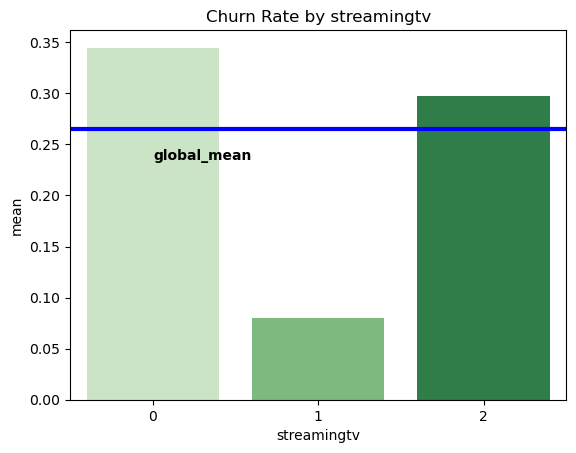

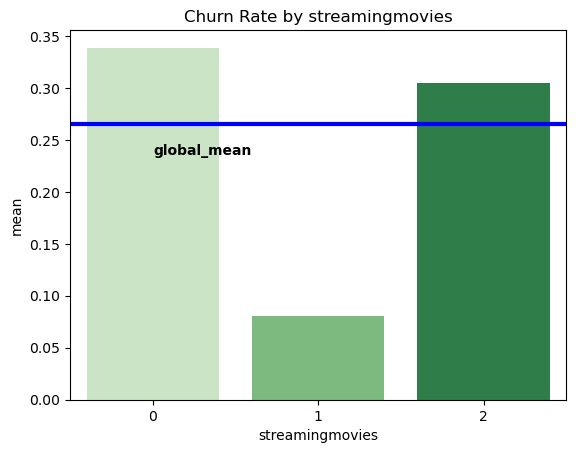

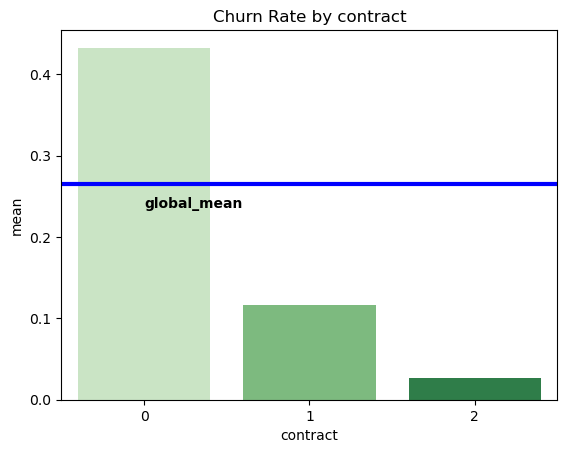

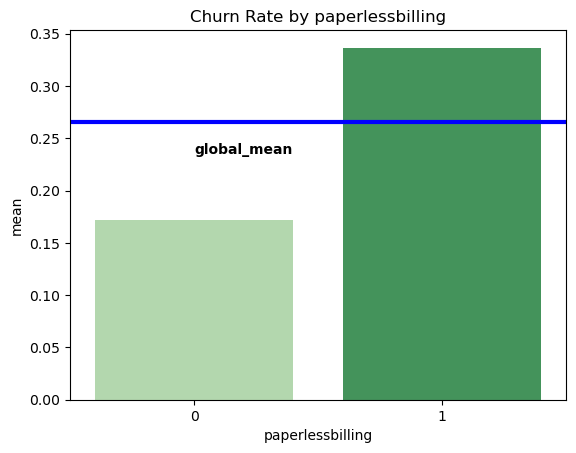

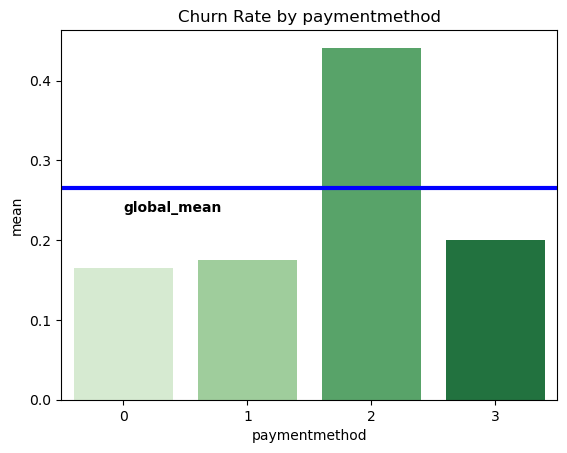

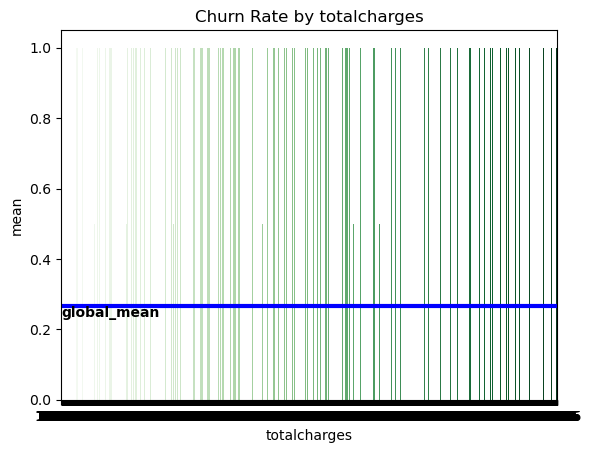

In [245]:


# Plotting
for feature in categorical:
    df_group = df_train.groupby(by=feature).churn.agg(['mean']).reset_index()
    graph = sns.barplot(x=feature, y='mean', data=df_group, palette='Greens')
    graph.axhline(global_mean, linewidth=3, color='b')
    plt.text(0, global_mean-0.03, "global_mean", color='black', weight='semibold')
    plt.title(f'Churn Rate by {feature}')
    plt.show()


In [391]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.2, random_state=1)
print("Training Data Size: ", df_train.shape)
print("Validation Data Size: ", df_valid.shape)
print("Testing Data Size: ", df_test.shape)
df_train.isnull().sum()

Training Data Size:  (4507, 20)
Validation Data Size:  (1127, 20)
Testing Data Size:  (1409, 20)


gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [392]:
df_train[categorical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
2678,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,No
5594,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,No
4077,Female,1,Yes,Yes,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,No
4758,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),No
4445,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,No,Credit card (automatic),No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,Male,1,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,No
6108,Male,0,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,No
1530,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,No,Credit card (automatic),Yes
3701,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,No


In [393]:
df_train.totalcharges.isnull().sum()
df_valid.totalcharges.isnull().sum()
df_test.totalcharges.isnull().sum()

0

In [394]:
df_train[categorical].info()
# Convertir la colonne 'colonne_objet' en int 
# Convert 'totalcharges' to numeric, setting errors='coerce' to handle non-numeric values
df_train['totalcharges'] = pd.to_numeric(df_train['totalcharges'], errors='coerce')

# Fill NaN values with 0 (or another appropriate value)
df_train['totalcharges'].fillna(0, inplace=True)

# Convert the column to integers
df_train['totalcharges'] = df_train['totalcharges'].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4507 entries, 2678 to 4368
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            4507 non-null   object
 1   seniorcitizen     4507 non-null   object
 2   partner           4507 non-null   object
 3   dependents        4507 non-null   object
 4   phoneservice      4507 non-null   object
 5   multiplelines     4507 non-null   object
 6   internetservice   4507 non-null   object
 7   onlinesecurity    4507 non-null   object
 8   onlinebackup      4507 non-null   object
 9   deviceprotection  4507 non-null   object
 10  techsupport       4507 non-null   object
 11  streamingtv       4507 non-null   object
 12  streamingmovies   4507 non-null   object
 13  contract          4507 non-null   object
 14  paperlessbilling  4507 non-null   object
 15  paymentmethod     4507 non-null   object
 16  churn             4507 non-null   object
dtypes: object(17)
me

In [389]:
from sklearn.metrics import mutual_info_score



# Define the function to calculate mutual information
def calculate_mi(series):
    return mutual_info_score(series, df_train.churn)

# Apply the function to the categorical features
df_mi = df_train[categorical].apply(calculate_mi)
df_mi=df_mi.sort_values(ascending=False).to_frame(name='MI')
display(df_mi.head())
display(df_mi.tail())

,MI
churn,0.581287
contract,0.100378
onlinesecurity,0.062802
techsupport,0.059945
internetservice,0.053951


,MI
partner,0.009443
seniorcitizen,0.008396
multiplelines,0.000821
gender,0.000099
phoneservice,0.000098


In [395]:
data[numerical].corrwith(data.churn)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [396]:
#tenure
t1=data[data['tenure'] <=2].churn.mean()

TypeError: Could not convert NoYesYesYesYesYesNoNoNoNoYesNoYesNoNoNoNoYesYesYesYesNoYesYesNoYesNoYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesNoYesNoNoYesYesNoYesNoYesNoYesYesNoNoYesYesYesNoNoYesNoNoYesYesNoYesNoYesNoYesNoNoYesNoNoNoNoYesNoYesNoNoYesYesYesYesYesNoYesYesYesYesNoNoYesNoNoNoYesNoNoNoNoNoYesYesYesYesNoNoYesYesYesYesNoYesNoYesNoYesNoYesYesYesYesYesYesYesNoNoYesNoYesYesYesYesNoNoYesNoNoYesYesNoYesNoYesYesYesYesYesYesYesYesYesNoYesNoNoNoNoYesYesNoYesYesYesNoYesNoNoYesNoYesYesYesYesNoYesNoNoYesNoNoYesYesYesYesYesYesNoYesNoYesNoYesNoNoYesYesNoYesYesYesNoYesYesNoYesYesYesNoYesNoNoYesNoYesNoNoNoYesNoYesYesYesYesYesYesNoNoYesYesYesYesYesNoNoNoNoNoYesYesYesYesYesYesYesYesYesNoYesNoNoNoYesYesYesYesYesYesYesNoYesNoNoYesYesNoNoYesYesNoNoNoYesYesYesYesNoYesNoYesYesNoYesYesYesNoYesYesNoYesYesNoNoNoYesNoYesNoYesYesNoNoYesYesNoYesYesYesNoYesNoNoYesYesNoYesYesYesNoNoYesYesNoNoNoYesYesYesNoNoYesYesNoNoYesNoYesYesYesYesNoNoYesNoNoYesNoNoYesNoYesYesYesNoYesYesNoNoNoNoNoNoNoYesNoNoYesYesNoYesYesNoNoYesNoYesYesNoYesNoNoYesYesYesYesYesNoYesYesNoNoYesNoYesYesYesYesNoNoYesNoNoNoYesNoYesYesYesYesYesYesNoNoYesNoNoYesYesNoNoYesNoNoNoYesNoYesNoYesNoNoYesNoNoYesYesNoYesYesYesNoYesYesYesNoYesYesYesYesNoNoYesYesYesNoYesYesNoNoNoYesYesNoNoYesNoYesYesYesYesYesNoYesNoNoYesNoNoYesNoNoNoYesYesNoYesNoYesYesYesNoYesYesNoNoYesYesYesNoYesNoNoYesYesYesNoYesYesYesNoNoNoYesYesYesYesNoNoNoYesNoNoYesNoYesYesNoNoYesNoYesYesYesNoNoYesYesYesYesYesNoNoYesNoNoYesYesYesNoYesYesYesYesYesNoNoYesYesYesNoYesNoYesYesNoYesYesYesNoNoYesNoYesYesNoNoNoYesYesNoYesNoNoNoYesYesYesYesYesYesYesYesNoNoNoYesNoYesNoNoYesYesYesYesYesNoYesNoNoNoYesYesYesNoYesYesYesNoYesYesNoYesYesNoNoYesYesNoNoNoNoNoNoYesNoYesNoYesNoNoNoYesNoYesYesNoYesYesNoYesNoYesYesYesYesNoYesYesNoYesYesYesYesNoNoYesNoYesNoNoNoYesNoYesYesYesNoYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesNoNoYesNoYesYesNoNoYesNoNoYesNoYesNoYesNoYesYesYesYesYesYesYesNoNoYesNoYesYesNoNoYesYesNoNoNoNoNoNoYesYesYesYesYesNoYesYesYesNoYesNoNoNoNoNoNoYesYesNoYesYesYesNoYesYesYesNoYesYesNoYesYesYesNoYesNoYesYesNoYesNoYesYesNoYesYesYesNoYesNoYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesNoYesNoNoNoYesYesNoYesNoYesNoNoYesNoYesYesYesYesNoNoYesNoNoYesYesYesYesNoYesYesYesYesNoYesNoYesNoYes to numeric

In [285]:
t1

0.5835266821345708

In [286]:
t2=data[(data['tenure']>=3)].churn.mean()

In [288]:
t3=data[(data['tenure']>=12)].churn.mean()

In [289]:
t2,t3

(0.17490952955367914, 0.17490952955367914)

Text(0, 0.5, 'Churn Rate')

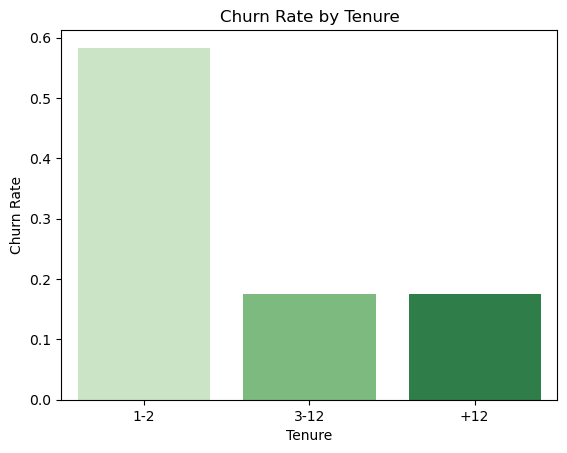

In [291]:
sns.barplot(x=['1-2','3-12','+12'],y=[t1,t2,t3],palette='Greens')
plt.title('Churn Rate by Tenure')  
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')



In [321]:
#Preprocessing
#Handling Categorical Variables one-hot encoding:
df_train_enc=pd.get_dummies(df_train,drop_first=True)

In [322]:
df_train_enc

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2678,5000,1,0,0,0,30,1,0,2,1,...,1,1,1,1,1,0,3,19.70,625,0
5594,22,0,0,1,1,23,1,2,1,0,...,0,0,2,0,0,1,2,83.75,1849,0
4077,624,0,1,1,1,14,1,2,1,0,...,0,0,2,2,0,1,2,95.80,1346,0
4758,2550,0,0,0,0,56,1,0,2,1,...,1,1,1,1,2,0,0,19.70,1051,0
4445,2188,0,0,0,0,63,1,2,1,2,...,2,0,2,0,2,0,1,98.00,6218,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,902,1,1,1,1,52,1,2,0,0,...,2,0,2,2,1,1,2,80.85,4079,0
6108,3390,1,0,0,0,18,0,1,0,0,...,0,0,0,0,0,0,3,25.15,476,0
1530,2590,1,0,1,1,2,1,0,1,0,...,2,2,0,2,0,0,1,90.00,190,1
3701,2689,0,0,1,1,27,1,2,2,1,...,1,1,1,1,2,0,2,24.50,761,0


<4507x7377 sparse matrix of type '<class 'numpy.float64'>'
	with 58351 stored elements in Compressed Sparse Row format>

In [397]:
df_train_enc

,gender_1,seniorcitizen_1,partner_1,dependents_1,phoneservice_1,multiplelines_1,multiplelines_2,internetservice_1,internetservice_2,onlinesecurity_1,...,contract_2,paperlessbilling_1,paymentmethod_1,paymentmethod_2,paymentmethod_3,churn_1,customerid,tenure,monthlycharges,totalcharges
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,5000,30,19.7,625.05
1,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,22,23,83.75,1849.95
2,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,624,14,95.8,1346.3
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2550,56,19.7,1051.9
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,2188,63,98.0,6218.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,902,52,80.85,4079.55
4503,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3390,18,25.15,476.8
4504,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,2590,2,90.0,190.05
4505,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,2689,27,24.5,761.95


In [398]:
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

In [400]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import pandas as pd

# Assuming 'categorical' is a list of column names that are categorical
categorical = ['partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 
               'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 
               'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 
               'paymentmethod', 'churn']  # Replace with your actual categorical columns

# Convert all categorical columns to strings
df_train[categorical] = df_train[categorical].astype(str)

ohe = OneHotEncoder(drop='first')

transformer = make_column_transformer((ohe, categorical), remainder='passthrough',
                                      verbose_feature_names_out=False)

train_enc = transformer.fit_transform(df_train)
df_train_enc = pd.DataFrame(train_enc, columns=transformer.get_feature_names_out())



In [401]:
df_train_enc

,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,...,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn_Yes,gender,seniorcitizen,tenure,monthlycharges,totalcharges
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,Male,0,30,19.7,625
1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,Female,0,23,83.75,1849
2,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,Female,1,14,95.8,1346
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,Female,0,56,19.7,1051
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,Female,0,63,98.0,6218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,Male,1,52,80.85,4079
4503,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,Male,0,18,25.15,476
4504,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,Male,0,2,90.0,190
4505,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,Female,0,27,24.5,761


In [404]:
X_train = df_train_enc.drop('churn_Yes', axis=1)
y_train = df_train_enc['churn_Yes']

In [407]:
valid_enc = transformer.transform(df_valid)
df_valid_enc = pd.DataFrame(valid_enc, columns=transformer.get_feature_names_out())



In [409]:
df_valid_enc
X_valid = df_valid_enc.drop('churn_Yes', axis=1)
y_valid = df_valid_enc['churn_Yes']

In [411]:
test_enc = transformer.transform(df_test)
df_test_enc = pd.DataFrame(test_enc, columns=transformer.get_feature_names_out())
X_test = df_test_enc.drop('churn_Yes', axis=1)
y_test = df_test_enc['churn_Yes']

In [412]:
df_train[numerical].describe()

,tenure,monthlycharges,totalcharges
count,4507.000000,4507.000000,4507.000000
mean,32.001553,64.312536,2237.201021
std,24.558539,30.089423,2248.495590
min,0.000000,18.250000,18.000000
25%,8.000000,34.700000,383.000000
50%,28.000000,70.150000,1359.000000
75%,55.000000,89.575000,3707.500000
max,72.000000,118.350000,8684.000000


In [413]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit_transform(df_train[numerical])

array([[-0.08151035, -1.48282956, -0.71709276],
       [-0.36657522,  0.64606159, -0.17266838],
       [-0.7330872 ,  1.04657898, -0.39639833],
       ...,
       [-1.22176983,  0.85379883, -0.91057691],
       [-0.20368101, -1.32328737, -0.65660116],
       [-0.93670496,  0.54967152, -0.66104907]])

In [567]:
def preprocess(df_train, df_valid, df_test, num, cat):
    # Define transformers
    ohe = OneHotEncoder(drop='first')
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),
                                           (ohe, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)
    # Fitting & Transformation
    X_train = transformer.fit_transform(df_train[cat+num])
    X_valid = transformer.transform(df_valid[cat+num])
    X_test = transformer.transform(df_test[cat+num])
    columns=transformer.get_feature_names_out()
   
    return X_train , X_valid, X_test, columns
def split(enc_data):
    return enc_data[:,:-1],enc_data[:,-1]

In [561]:
train_enc , valid_enc, test_enc, columns = preprocess(df_train, df_valid, df_test, numerical, categorical)

In [570]:
X_train,Y_train=split(train_enc)
X_train.shape

(4507, 28)

In [603]:
X_valid,Y_valid=split(valid_enc)
X_valid.shape
y_valid.shape
X_test,Y_test=split(test_enc)

In [580]:
#modelling
def linear_regression(xi):
    result = bias
    for j in range(n):
        result = result + xi[j] * w[j]
    return result

In [579]:
def logistic_regression(xi):
    score = bias
    for j in range(n):
        score = score + xi[j] * w[j]
    prob = sigmoid(score)
    return prob

In [581]:

import math
def sigmoid(score):
    return 1 / (1 + math.exp(-score))

In [590]:
#applying logistic regression:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(solver='liblinear', random_state=1)
model_1.fit(X_train, Y_train)  # ====> Weights

LogisticRegression(random_state=1, solver='liblinear')

In [596]:
X_train.shape

(4507, 28)

In [600]:
X_valid

array([[ 1.58815531,  0.21729195,  1.21703711, ...,  1.        ,
         0.        ,  0.        ],
       [-1.26249339, -1.44792971, -0.98585782, ...,  0.        ,
         0.        ,  1.        ],
       [-1.26249339, -1.46122489, -0.98603573, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.24427807, -1.48615336, -0.67603853, ...,  0.        ,
         1.        ,  0.        ],
       [-0.61091654,  0.40342451, -0.44648182, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.7329607 ,  0.22393954,  0.53715159, ...,  0.        ,
         1.        ,  0.        ]])

In [598]:
y_val_pred = model_1.predict_proba(X_valid)
y_val_pred

array([[0.99284121, 0.00715879],
       [0.80135586, 0.19864414],
       [0.78458967, 0.21541033],
       ...,
       [0.96096767, 0.03903233],
       [0.44304615, 0.55695385],
       [0.72396102, 0.27603898]])

In [612]:
y_test_pred = model_1.predict_proba(X_test)
y_test_pred

array([[0.94324772, 0.05675228],
       [0.92225547, 0.07774453],
       [0.66206534, 0.33793466],
       ...,
       [0.99463605, 0.00536395],
       [0.82170647, 0.17829353],
       [0.3877474 , 0.6122526 ]])

In [613]:
y_test_pred[:,1]

array([0.05675228, 0.07774453, 0.33793466, ..., 0.00536395, 0.17829353,
       0.6122526 ])

In [614]:
y_test_pred[:,1] > 0.5

array([False, False, False, ..., False, False,  True])

In [615]:
y_test_pred = (y_test_pred[:,1] > 0.5).astype(int)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [616]:
(y_test_pred == Y_test).mean()


0.8105039034776437

In [617]:
print('LogisticRegression Training Accuracy: ', round(model_1.score(X_train, Y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_1.score(X_valid, Y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_1.score(X_test, Y_test), 2))

LogisticRegression Training Accuracy:  0.8
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.81


In [729]:
#model saving:
train_encd, valid_encd, test_encd, columns = preprocess(df_train, df_valid, df_test, numerical, important_cat)
X_valid,Y_valid=split(valid_enc)
X_test,Y_test=split(test_encd)
X_train,y_train=split(train_encd)
model_2 =  LogisticRegression(solver='liblinear', random_state=1)
model_2.fit(X_train, Y_train)
model_2.score(X_train,y_train)
model_2.score(X_test,Y_test)
X_train = df_train[numerical]
X_valid = df_valid[numerical]
X_test  = df_test[numerical]

model_3 = LogisticRegression(solver='liblinear', random_state=1)
model_3.fit(X_train, y_train)
print('LogisticRegression Training Accuracy: ', round(model_3.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_3.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_3.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.99
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.78


In [730]:
pickle.dump(model_3,open("logistique_regression_pk1",'wb'))

In [731]:
#model loading
loaded_model=pickle.load(open('logistique_regression_pk1','rb'))
important_cat = df_mi.head().index.to_list()
important_cat

['churn', 'contract', 'onlinesecurity', 'techsupport', 'internetservice']

In [732]:
df_test[important_cat + numerical].iloc[10]

churn                          No
contract           Month-to-month
onlinesecurity                 No
techsupport                    No
internetservice       Fiber optic
tenure                         32
monthlycharges              93.95
totalcharges              2861.45
Name: 407, dtype: object

In [733]:
# Transformers
def preprocess_fit(df_train, num, cat):
    # Define transformers
    ohe = OneHotEncoder(drop='first')
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),
                                           (ohe, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)
    # Fitting & Transformation
    transformer.fit(df_train[cat+num])
    return transformer

In [734]:
transformer = preprocess_fit(df_train, numerical, important_cat)
important_cat = df_mi.head().index.to_list()
important_cat

['churn', 'contract', 'onlinesecurity', 'techsupport', 'internetservice']

In [735]:
df_test.iloc[10][important_cat + numerical]

churn                          No
contract           Month-to-month
onlinesecurity                 No
techsupport                    No
internetservice       Fiber optic
tenure                         32
monthlycharges              93.95
totalcharges              2861.45
Name: 407, dtype: object

In [736]:
pd.DataFrame(df_test.iloc[10][important_cat + numerical]).T

,churn,contract,onlinesecurity,techsupport,internetservice,tenure,monthlycharges,totalcharges
407,No,Month-to-month,No,No,Fiber optic,32,93.95,2861.45


In [746]:
x = df_test.iloc[10][important_cat + numerical].to_dict()
x = pd.DataFrame(x, index=[0])
x
transformer.transform(x)
pickle.dump(transformer, open("transformer.pkl", 'wb'))

In [751]:
trans = pickle.load(open('transformer.pkl', 'rb'))
model = pickle.load(open('logistique_regression_pk1', 'rb'))

In [739]:
x = df_test.iloc[10][important_cat + numerical].to_dict()

In [740]:
x = pd.DataFrame(x, index=[0])
x

,churn,contract,onlinesecurity,techsupport,internetservice,tenure,monthlycharges,totalcharges
0,No,Month-to-month,No,No,Fiber optic,32,93.95,2861.45


In [753]:
#transform saving:
cust ={'contract': 'Month-to-month',
 'onlinesecurity': 'No',
 'techsupport': 'No',
 'internetservice': 'Fiber optic',
 'onlinebackup': 'Yes',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [757]:
#cust = trans.transform(pd.DataFrame(cust, index=[0]))

In [743]:
pd.DataFrame(cust, index=[0])

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
0,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [759]:
#cust = trans.transform(pd.DataFrame(cust, index=[0]))

In [760]:




print(cust_transformed)


NameError: name 'cust_transformed' is not defined

C:\Users\HP PROBOOK\anaconda32\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array={'contract': 'Month-to-month', 'onlinesecurity': 'No', 'techsupport': 'No', 'internetservice': 'Fiber optic', 'onlinebackup': 'Yes', 'tenure': 32, 'monthlycharges': 93.95, 'totalcharges': 2861.45}.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [710]:
model.predict_proba(cust)[0][1]

ValueError: Expected 2D array, got scalar array instead:
array={'contract': 'Month-to-month', 'onlinesecurity': 'No', 'techsupport': 'No', 'internetservice': 'Fiber optic', 'onlinebackup': 'Yes', 'tenure': 32, 'monthlycharges': 93.95, 'totalcharges': 2861.45}.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.